# BaggingClassifier

In [3]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
import sys
sys.path.append("../..//my-staff")
from utils import load_ds

# Cargar dataset

In [4]:
X, y, features_names, class_names = load_ds("all")
X.shape

(293, 25)

In [5]:
X_train, y_train, _, _ = load_ds("train")
X_train.shape

(205, 25)

In [6]:
X_test, y_test, _, _ = load_ds("test")
X_test.shape

(88, 25)

In [7]:
from utils import grid_search_no_fss, SEED
from sklearn.tree import DecisionTreeClassifier


In [23]:
model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=SEED)


In [24]:
param_grid = {
    'n_estimators': [10, 50, 100],  # Número de árboles en el ensamble
    'max_samples': [0.5, 1.0],  # Máxima cantidad de muestras a extraer de X para entrenar cada estimador base
    'max_features': [0.5, 1.0],  # Máxima cantidad de características a extraer de X para entrenar cada estimador base
    'base_estimator__max_depth': [3, 5, 10]  # Profundidad máxima para cada árbol de decisión
}

In [25]:
result = grid_search_no_fss(X_train, y_train, model, param_grid)

Starting evaluation with all variables


/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for mo

f1 0.7559480889129845


/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:930: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  self.best_estimator_ = clone(base_estimator).set_params(


In [26]:
result

ResultGridSearch(best_model=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=100, random_state=8), best_num_features=205, selected_feature_names=['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Ascites_N', 'Ascites_Y', 'Drug_D-penicillamine', 'Drug_Placebo', 'Spiders_N', 'Spiders_Y', 'Sex_F', 'Sex_M', 'Edema_N', 'Edema_S', 'Edema_Y'], best_score=0.7559480889129845)

In [27]:
best_model = result.best_model

In [28]:
hipers = best_model.get_params()
hipers

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 10,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=10),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}

In [29]:
features = result.selected_feature_names
features

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Ascites_N',
 'Ascites_Y',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Spiders_N',
 'Spiders_Y',
 'Sex_F',
 'Sex_M',
 'Edema_N',
 'Edema_S',
 'Edema_Y']

# Training the model

In [31]:
model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=SEED)
model.set_params(**hipers)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=100, random_state=8)

In [32]:
model.fit(X_train[features], y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=100, random_state=8)

# Evaluation

In [33]:
from utils import eval_model


In [34]:
print("Training score: ", model.score(X_train[features], y_train))
print("Test score: ", model.score(X_test[features], y_test))

Training score:  1.0
Test score:  0.7727272727272727


In [35]:
y_prob = model.predict_proba(X_test[features])[:,0]
y_pred = model.predict(X_test[features])
eval_model(y_true= y_test, y_pred=y_pred, y_prob=y_prob)

Métricas de evaluación:
Precision: 0.7719
Recall: 0.7727
F1-score: 0.7719
Brier Score: 0.5475


# Visualización del modelo

# Evaluation good

In [36]:
from sklearn.model_selection import StratifiedKFold, permutation_test_score
from globals import K_FOLD


In [38]:

m = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=SEED)
m.set_params(**hipers)
cv = StratifiedKFold(K_FOLD, shuffle=True, random_state=0)

score, perm_score, pvalue = permutation_test_score(
    m, X[features], y, scoring="f1", cv=cv, n_permutations=500, n_jobs=-1
)


Score on original
data f1: 0.78
(p-value: 0.002)


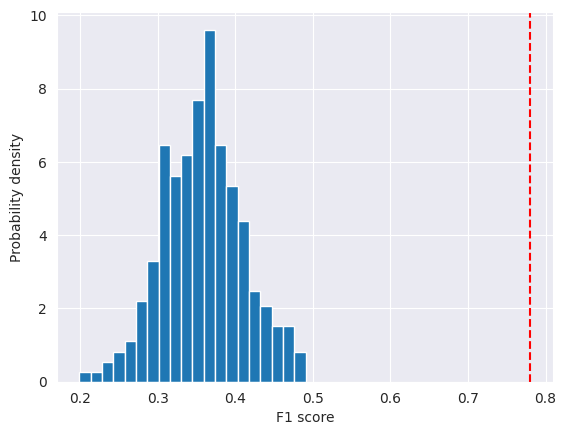

In [39]:
fig, ax = plt.subplots()

print(f"Score on original\ndata f1: {score:.2f}\n(p-value: {pvalue:.3f})"
)
ax.hist(perm_score, bins=20, density=True)
ax.axvline(score, ls="--", color="r")
ax.set_xlabel("F1 score")
_ = ax.set_ylabel("Probability density")